In [1]:
import networkx as nx
import torch
import numpy as np
from torch_geometric.data import Data

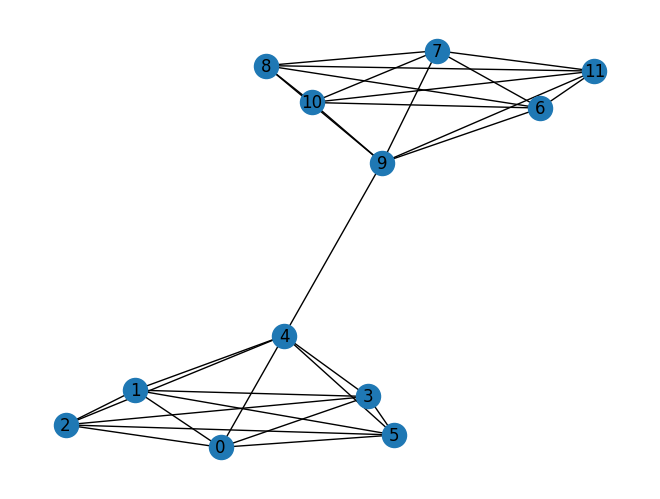

In [18]:
G = nx.complete_graph(6)
H = nx.complete_graph(6)
G = nx.relabel_nodes(G, lambda x: x)
H = nx.relabel_nodes(H, lambda x: x + 6)
barbell = nx.compose(G, H)
u = np.random.randint(0, 6)
v = np.random.randint(6, 12)
barbell.add_edge(u, v)
nx.draw(barbell, with_labels=True)

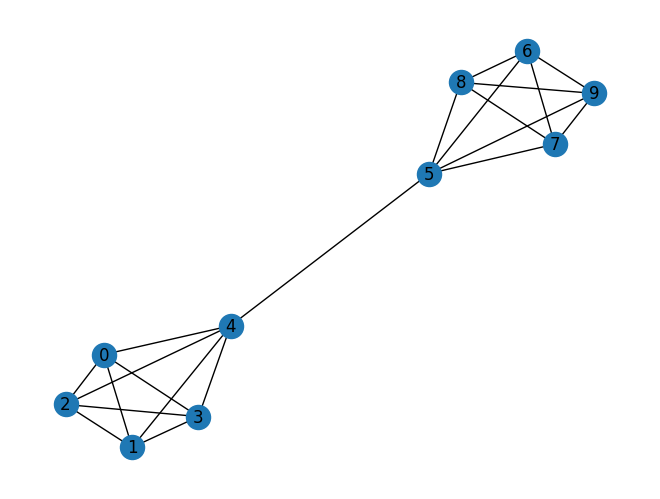

In [15]:
graph = nx.barbell_graph(5, 0)
nx.draw(graph, with_labels=True)

In [15]:
N = 10
features = torch.zeros(graph.number_of_nodes())
for i in range(graph.number_of_nodes()//2):
    features[i] = np.random.uniform(-(3*N)**0.5, 0)
    features[i+graph.number_of_nodes()//2] = np.random.uniform(0, (3*N)**0.5)
labels = torch.zeros(graph.number_of_nodes())
avg_left = features[:graph.number_of_nodes()//2].mean()
avg_right = features[graph.number_of_nodes()//2:].mean()
for i in range(graph.number_of_nodes()//2):
    labels[i] = avg_right
    labels[i+graph.number_of_nodes()//2] = avg_left
print("Features: ", features)
print("Labels: ", labels)

Features:  tensor([-1.5218, -0.4116, -0.9846, -0.9992, -1.9413, -2.5040,  1.6987,  3.4819,
         1.2829,  4.1578,  3.9269,  2.7601])
Labels:  tensor([ 2.8847,  2.8847,  2.8847,  2.8847,  2.8847,  2.8847, -1.3937, -1.3937,
        -1.3937, -1.3937, -1.3937, -1.3937])


In [16]:
edges = torch.tensor(list(graph.edges)).t()
full_edges = torch.unique(torch.cat([edges, edges.flip(0)], dim=1), dim=1)
print(edges.shape)
print(full_edges.shape)

torch.Size([2, 31])
torch.Size([2, 62])


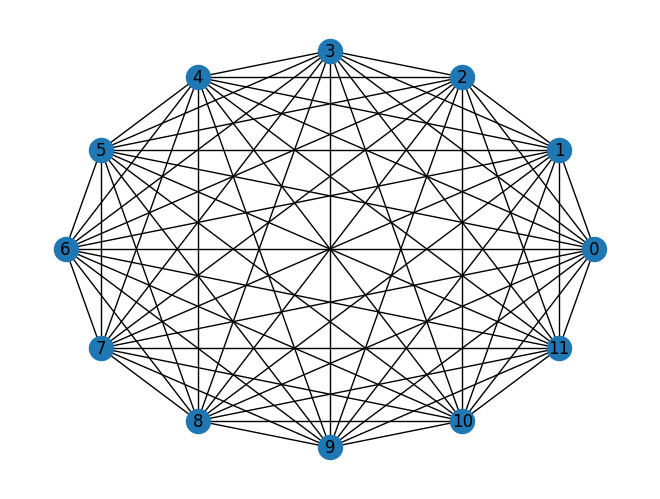

In [19]:
graph2 = nx.complete_graph(12)
nx.draw(graph2, pos=nx.circular_layout(graph2), with_labels=True)

In [2]:
def load_synthetic_data(task):
    N = 10
    datasets = []
    if task == 'oversquashing':
        graph = nx.barbell_graph(6, 0)
    elif task == 'oversmoothing':
        graph = nx.complete_graph(12)
    else:
        raise ValueError(f"Unknown task: {task}")
    edges = torch.tensor(list(graph.edges)).t()
    full_edges = torch.unique(torch.cat([edges, edges.flip(0)], dim=1), dim=1)
    for i in range(2):
        features = torch.zeros(graph.number_of_nodes())
        for i in range(graph.number_of_nodes()//2):
            features[i] = np.random.uniform(-(3*N)**0.5, 0)
            features[i+graph.number_of_nodes()//2] = np.random.uniform(0, (3*N)**0.5)
        labels = torch.zeros(graph.number_of_nodes())
        avg_left = features[:graph.number_of_nodes()//2].mean()
        avg_right = features[graph.number_of_nodes()//2:].mean()
        for i in range(graph.number_of_nodes()//2):
            labels[i] = avg_right
            labels[i+graph.number_of_nodes()//2] = avg_left
        
        
        datasets.append(Data(x=features,
                    edge_index=full_edges,
                    y=labels))
    
    return datasets

In [ ]:
graph, datasets = load_synthetic_data('oversmoothing')
data1, data2 = datasets[0], datasets[1]

In [47]:
data1.x, data1.edge_index, data1.y

(tensor([-0.0141, -2.4025, -4.6519, -1.2606, -0.9997, -1.5480,  2.3899,  1.7308,
          0.1067,  0.7345,  0.1898,  2.6409]),
 tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
           3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
           4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
           6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
           8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
           9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
          11, 11, 11, 11, 11, 11],
         [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  2,  3,  4,  5,  6,  7,
           8,  9, 10, 11,  0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,
           4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  5,  6,  7,  8,  9, 10,
          11,  0,

In [48]:
data2.x, data2.edge_index, data2.y

(tensor([-0.8955, -2.5632, -1.7049, -2.5782, -1.8325, -1.4127,  1.0680,  3.5606,
          2.5349,  4.2530,  1.4617,  0.4423]),
 tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
           3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
           4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
           6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
           8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
           9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
          11, 11, 11, 11, 11, 11],
         [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  2,  3,  4,  5,  6,  7,
           8,  9, 10, 11,  0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,
           4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  5,  6,  7,  8,  9, 10,
          11,  0,

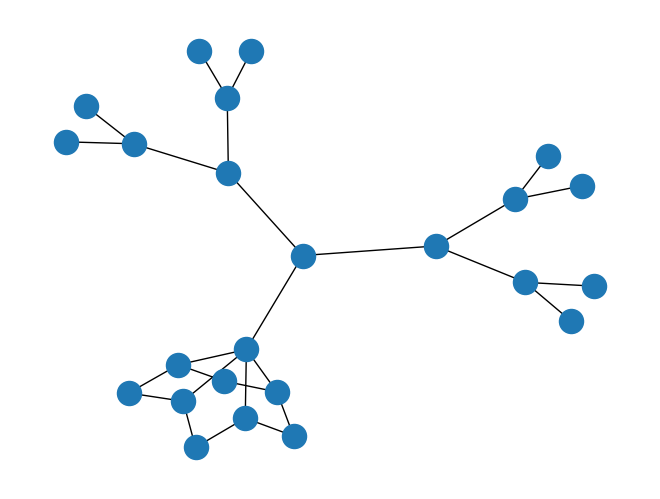

In [5]:
tree_depth = 3
grid_size = 3

# 1. Create binary tree
tree = nx.balanced_tree(r=2, h=tree_depth)
tree_nodes = list(tree.nodes())
tree_size = len(tree_nodes)

# 2. Create grid
grid = nx.grid_2d_graph(grid_size, grid_size)
grid = nx.convert_node_labels_to_integers(grid, first_label=tree_size)
grid_nodes = list(grid.nodes())
grid_size_total = len(grid_nodes)

# 3. Combine graphs
G = nx.union(tree, grid)
tree_root = 0
grid_center = tree_size + (grid_size * grid_size) // 2
G.add_edge(tree_root, grid_center)
nx.draw(G)

In [7]:
def load_synthetic_data(task):
    N = 10
    size = 10
    datasets = []
    if task == 'oversquashing':
        graph = nx.barbell_graph(6, 0)
    elif task == 'oversmoothing':
        graph = nx.complete_graph(12)
    else:
        raise ValueError(f"Unknown task: {task}")
    edges = torch.tensor(list(graph.edges)).t()
    full_edges = torch.unique(torch.cat([edges, edges.flip(0)], dim=1), dim=1)
    for _ in range(2):
        # Generate features
        features = torch.zeros((graph.number_of_nodes(), size))
        for i in range(graph.number_of_nodes()//2):
            features[i] = torch.tensor(np.random.uniform(-(3*N)**0.5, 0, size))
            features[i+graph.number_of_nodes()//2] = torch.tensor(np.random.uniform(0, (3*N)**0.5, size))
        
        # Compute labels
        avg_left = features[:graph.number_of_nodes()//2].mean(dim=0)
        avg_right = features[graph.number_of_nodes()//2:].mean(dim=0)
        
        labels = torch.zeros((graph.number_of_nodes(), size))
        for i in range(graph.number_of_nodes()//2):
            labels[i] = avg_right
            labels[i+graph.number_of_nodes()//2] = avg_left

        datasets.append(Data(
            x=features,
            edge_index=full_edges,
            y=labels,
            random_walk_pe=torch.empty(graph.number_of_nodes(), 0)
        ))
    
    return graph, datasets

In [ ]:
G, datasets = load_synthetic_data('oversquashing')
print(datasets[0].x)
nx.draw_networkx_labels(G, pos=nx.spring_layout(G), labels=datasets[0].x)

tensor([[-9.3243e-01, -4.9232e+00, -2.0095e+00, -3.6642e+00, -1.5881e+00,
         -1.3203e+00, -1.8955e+00, -1.9220e+00, -3.3370e+00, -7.0146e-02],
        [-5.2210e+00, -3.8670e+00, -4.0080e+00, -3.7979e+00, -3.9258e+00,
         -5.3812e+00, -9.4077e-01, -3.8190e+00, -5.3296e+00, -5.2572e+00],
        [-8.4430e-02, -4.9362e+00, -9.5624e-01, -1.9761e-01, -3.9967e+00,
         -4.0231e+00, -1.7375e+00, -2.0472e+00, -1.9555e+00, -4.2436e+00],
        [-1.4776e+00, -3.0552e+00, -2.9554e+00, -1.8877e+00, -2.8352e+00,
         -2.6517e+00, -1.3020e+00, -3.0127e+00, -4.7864e+00, -3.3822e+00],
        [-1.5905e+00, -6.0837e-01, -4.5410e+00, -1.3020e-03, -6.3921e-01,
         -5.3655e+00, -2.3372e+00, -2.0147e+00, -3.4455e-01, -7.0094e-01],
        [-2.3123e+00, -5.2139e+00, -5.1562e+00, -4.6586e+00, -2.5248e+00,
         -1.1777e+00, -6.5954e-01, -7.4120e-01, -4.6441e+00, -1.8785e+00],
        [ 2.1360e+00,  3.2915e+00,  3.2428e+00,  1.6766e+00,  4.0615e-02,
          2.3465e+00,  2.7109e+0

TypeError: draw_networkx_labels() missing 1 required positional argument: 'pos'